# Python Homework 1 <font color="red">Solution</font>

**Release date:** Friday, January 8<br>
**Due date:** Friday, January 22, at midnight via GauchoSpace

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename __PythonHW1_YOURPERMNUMBER.ipynb__.


Load some packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (10 Points)

1. <font color="red">__(5 Points)__</font> Implement the simulation of a Poisson process $(N_t)_{0 \leq t \leq 100}$ with parameter $\lambda = 0.1$ on the time interval $[0,100]$. 

In [3]:
# Define parameters
T1 = 100
PoissonRate1 = 0.1 

# For discretization of interval [0,100]
numberOfSteps1 = 1000          
stepSize1 = T1/numberOfSteps1

In [4]:
# Simulate the Poisson increments on the discretization grid

poissonIncrements1 = np.random.poisson(PoissonRate1*stepSize1,numberOfSteps1)

poissonProcess1 = np.cumsum(poissonIncrements1)

poissonProcess1 = np.insert(poissonProcess1,0,0) # Add start value N_0 = 0

In [5]:
# Check if jumps are at most of size 1

np.max(poissonIncrements1)

1

2. <font color="red">__(5 Points)__</font> Plot a trajectory of your simulated process from part 1. 

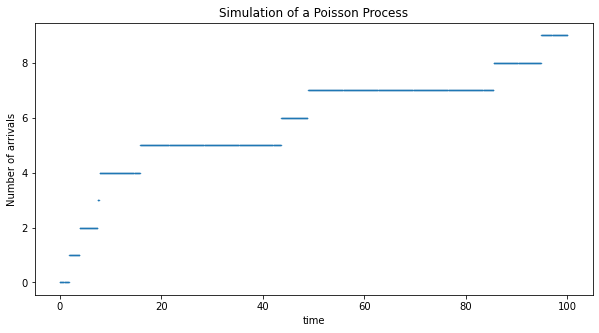

In [7]:
plt.figure(figsize=(10,5))

x = np.linspace(0,T1,numberOfSteps1+1)

plt.plot(x, poissonProcess1, marker='.',markersize='1',linestyle='')

plt.title('Simulation of a Poisson Process')
plt.ylabel('Number of arrivals')
plt.xlabel('time')

plt.show()

### <font color="blue">Alternative Solution 1: Simulation via Exponential Waiting Times</font> 

In [8]:
# Simulate exponentially distributed waiting times on [0,100]

arrivalTime = 0
arrivalTimesArray = np.array([0])

while arrivalTime < T1:
    
    waitingTime = np.random.exponential(1/PoissonRate1)
    
    arrivalTime = arrivalTime + waitingTime 
    
    if arrivalTime > T1:
        break
    
    arrivalTimesArray = np.append(arrivalTimesArray,arrivalTime)

In [10]:
# Simulate Poisson Process on discretization grid
    
poissonProcess_alt1 = np.zeros(numberOfSteps1+1)     
    
for i in range(0,numberOfSteps1):
    
    poissonProcess_alt1[i + 1] = poissonProcess_alt1[i] + np.sum(np.logical_and( arrivalTimesArray > i*stepSize1, arrivalTimesArray < (i+1) * stepSize1))


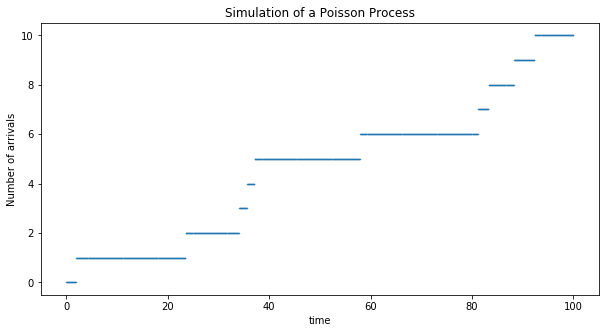

In [13]:
# Plot the trajectory

plt.figure(figsize=(10,5))

x = np.linspace(0,T1,numberOfSteps1+1)

plt.plot(x, poissonProcess_alt1, marker='.',markersize='1',linestyle='')

plt.title('Simulation of a Poisson Process')
plt.ylabel('Number of arrivals')
plt.xlabel('time')

plt.show()

### <font color="blue">Alternative Solution 2: Simulation via Uniformly distributed Arrival Times</font>

In [26]:
# Simulate the total number of jumps (Poisson distributed) on [0,100] 
# and then the uniformly distributed arrival times

totalNumberOfJumps = np.random.poisson(PoissonRate1*T1,1)

uniformSamples = np.random.uniform(0,T1,totalNumberOfJumps) 

arrivalTimesArray2 = np.sort(uniformSamples)

In [27]:
# Simulate the Poisson Process on the discretization grid

poissonProcess_alt2 = np.zeros(numberOfSteps1+1)     
    
for i in range(0,numberOfSteps1):
    
    poissonProcess_alt2[i + 1] = poissonProcess_alt2[i] + np.sum(np.logical_and( arrivalTimesArray2 > i*stepSize1, arrivalTimesArray2 < (i+1) * stepSize1))
    

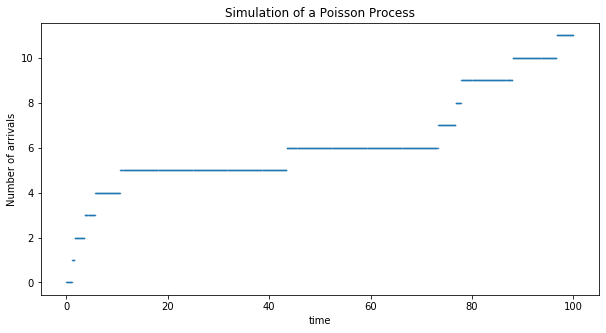

In [28]:
# Plot the trajectory

plt.figure(figsize=(10,5))

x = np.linspace(0,T1,numberOfSteps1+1)

plt.plot(x, poissonProcess_alt2, marker='.',markersize='1',linestyle='')

plt.title('Simulation of a Poisson Process')
plt.ylabel('Number of arrivals')
plt.xlabel('time')

plt.show()

# Problem 2 (10 Points)

1. <font color="red">__(5 Points)__</font> Simulate a __compound Poisson process__ $(C_t)_{0 \leq t \leq 30}$ with parameter $\lambda=1/2$ on the time interval $[0,30]$ where the jumps $Y_1, Y_2, \ldots$ are given as random variables

$$ Y_i = e^{Z_i} \qquad (i = 1,2,\ldots)$$

with $Z_1, Z_2, \ldots$ i.i.d. normal distributed random variables with mean 0 and variance 1 (also independent of the underlying Poisson process $(N_t)_{0 \leq t \leq 30}$). Plot a trajectory of your simulated process.

*Hint*: Use your method from Problem 1 to simulate the underlying Poisson Process $(N_t)_{0 \leq t \leq 30}$ driving the compound Poisson process $(C_t)_{0 \leq t \leq 30}$.

In [30]:
# Define parameters for Problem 2
T2 = 30
PoissonRate2 = 0.5 

# For discretization of interval [0,30]
numberOfSteps2 = 1000          
stepSize2 = T2/numberOfSteps2


In [31]:
# Simulate the Poisson increments on the discretization grid

poissonIncrements2 = np.random.poisson(PoissonRate2*stepSize2,numberOfSteps2)

# Simulate the jumps
jumpHeights = np.exp(np.random.normal(0,1,numberOfSteps2))

# Compute the compound Poisson process
compoundPoisson = np.cumsum(poissonIncrements2*jumpHeights)

compoundPoisson = np.insert(compoundPoisson,0,0) # Add start value C_0 = 0

In [32]:
# Check if jumps are at most of size 1

np.max(poissonIncrements2)

1

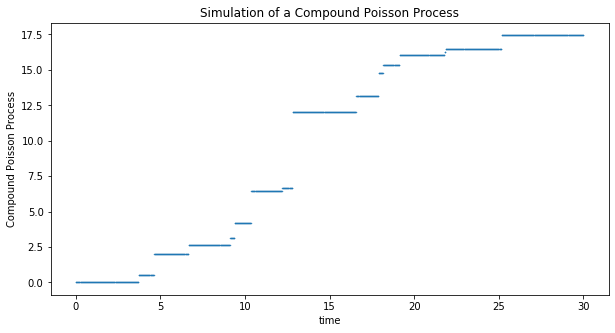

In [33]:
# Plot the path of the compound Poisson Process

plt.figure(figsize = (10,5))

x = np.linspace(0,T2,numberOfSteps2+1)

plt.plot(x, compoundPoisson, marker='.',markersize='1',linestyle='')

plt.title('Simulation of a Compound Poisson Process')
plt.ylabel('Compound Poisson Process')
plt.xlabel('time')

plt.show()

2. <font color="red">__(5 Points)__</font> Simulate $M=10000$ times the compound Poisson process from part 1 and compute the empricial mean and variance of your samples for the random variable $C_{30}$. Compare your empricial values with the exact theoretical values which are given by

$$\mathbb{E}[C_{30}] = \mathbb{E}[N_{30}] \cdot \mathbb{E}[Y_1] \qquad \text{and} \qquad \text{Var}(C_{30}) = \mathbb{E}[N_{30}] \cdot \mathbb{E}[Y^2_1].$$

*Hint*: Recall that 
$$\mathbb{E}[e^{Z_1}] = e^{0.5} \qquad \text{and} \qquad  \mathbb{E}[(e^{Z_1})^2] = e^2.$$

In [34]:
# Run 10000 simulations to simulate C_30

numberOfSimulations = 10000

samples = np.zeros(numberOfSimulations)

for i in range(0,numberOfSimulations):
    
    # Simulate a path on [0,30]
    poissonIncrements2 = np.random.poisson(PoissonRate2*stepSize2,numberOfSteps2)

    jumpHeights = np.exp(np.random.normal(0,1,numberOfSteps2))
    
    compoundPoisson = np.cumsum(poissonIncrements2*jumpHeights)
    compoundPoisson = np.insert(compoundPoisson,0,0)
    
    # Take the last simulated value
    samples[i] = compoundPoisson[-1]


In [35]:
# Compute empirical mean and empirical variance of the samples

samples.mean(), samples.std()**2

(24.686367241266296, 112.01978771247903)

In [36]:
# Compute theoretical mean and theoretical variance from known formulas above

30 * PoissonRate2 * np.exp(0.5), 30 * PoissonRate2 * np.exp(2)

(24.730819060501922, 110.83584148395975)